In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [4]:
gold_data = pd.read_csv('/content/archive(2).zip')

In [26]:
gold_data.head()
 # Import seaborn for heatmap visualization

# Assuming 'Date' is the column with date strings
gold_data['Date'] = pd.to_datetime(gold_data['Date'])  # Convert 'Date' column to datetime objects

# Extract numerical features for correlation calculation
numerical_features = gold_data.select_dtypes(include=['number'])

# Calculate correlation matrix for numerical features



In [27]:
gold_data.head()
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,2018-05-08,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,2018-05-09,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,2018-05-10,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,2018-05-14,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,2018-05-16,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
gold_data.shape

(2290, 6)

In [8]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [9]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [10]:
gold_data.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547


EDA
correlation:
1.positive corr
2.negative corr

<Axes: >

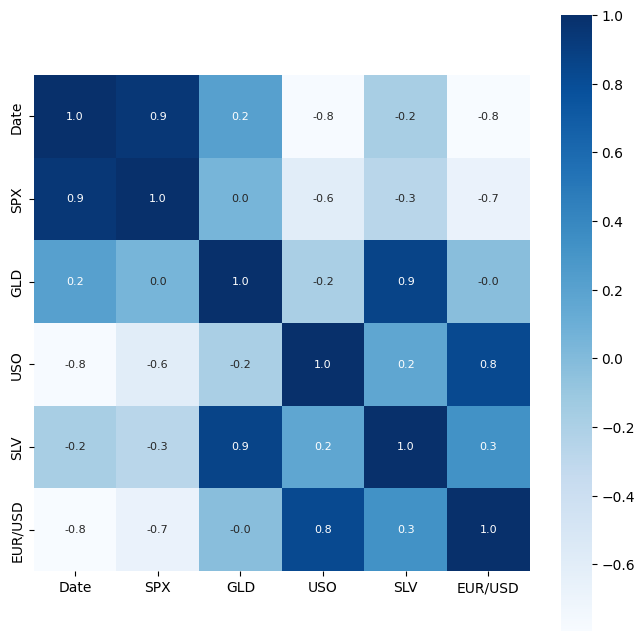

In [11]:
correlation = gold_data.corr() # Call the corr() method to calculate the correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [12]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


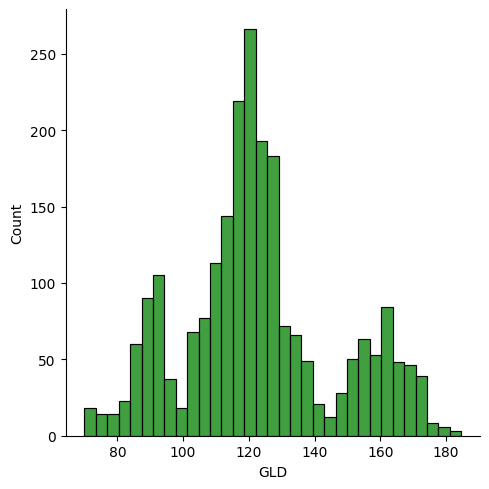

In [13]:
sns.displot(gold_data['GLD'],color='green')

Splitting Feature and Target

In [14]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting training data and testing data

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

MOdel selection and model training

In [16]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(x_train,y_train)


RandomForestRegressor()

In [18]:
test_data = regressor.predict(x_test)
print(test_data)

[168.36799885  82.18619977 115.96620007 127.67130065 120.72940152
 154.73109724 150.35039836 126.07239995 117.41499883 125.93970086
 116.65920112 171.17830093 141.58609808 168.02309814 115.27360008
 117.38110034 138.5853032  170.04840064 159.52770329 158.45679847
 155.20699975 125.00030019 175.88199942 156.81580386 125.11710039
  93.90129996  78.3247998  120.71799956 119.13809968 167.56409957
  88.29430065 125.13520046  91.18650065 117.50560026 121.06459904
 136.16640094 115.31820136 115.1595007  147.70479936 107.21220131
 104.46620244  87.0474978  126.51900086 117.84089997 152.94269915
 119.70169994 108.33719969 108.04129822  93.13870074 127.11839763
  74.71300055 113.70399927 121.3951998  111.32989914 118.89179887
 120.7392998  159.51730064 168.11840121 146.73989668  85.63869808
  94.22770048  86.84549881  90.52249975 118.96400059 126.46980073
 127.62980022 170.42060069 122.28929941 117.35949921  98.64460014
 168.12170079 142.96649879 132.1496023  121.07710236 120.80359964
 119.64600

In [25]:
error_score1 = metrics.r2_score(y_test,test_data)
error_score2 = metrics.mean_absolute_error(y_test,test_data)

print("R squared error : ",error_score1)
print("Mean absolute error : ",error_score2)

R squared error :  0.9890382370713684
Mean absolute error :  1.3519073225545828


compare actual value and predicted value

In [21]:
Y_test = list(y_test)

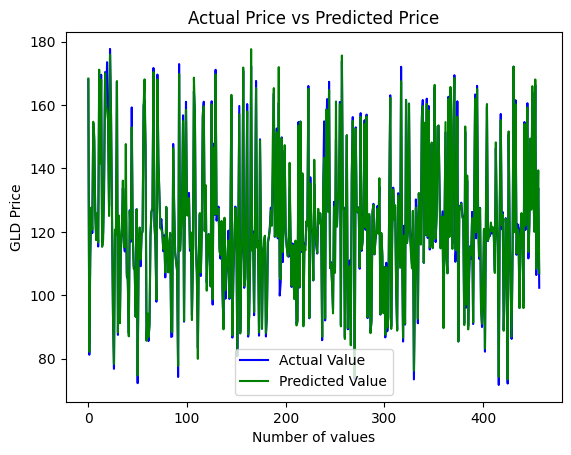

In [24]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [30]:
import pandas as pd

# Assuming these are the latest values or hypothetical values for your features
new_data = pd.DataFrame({
    'SPX': [5522],          # Example value for S&P 500 Index
    'USO': [77],            # Example value for Oil Prices
    'SLV': [26],            # Example value for Silver Prices
    'EUR/USD': [1.08]       # Example value for EUR/USD exchange rate
})

# Predicting the gold price based on new data
predicted_price = regressor.predict(new_data)
print("Predicted Gold Price: $", predicted_price[0])


Predicted Gold Price: $ 151.55520036000004
